## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
## Data Cleaning Level Ⅲ – Missing values, outliers, and errors


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Excercise 1
In this exercise, we will be using **Temperature Data.csv**. This dataset has some missing values. Do the following.

    a. After reading the file into a Pandas DataFrame, check if the dataset is level Ⅰ clean and if not clean it. Also, describe the cleanings if any.




In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data Preprocessing with Python/Dataset/Temperature Data.csv')
day_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P
1,RI2,TMP,2/1/2019 0:00,6.0,oC,P
2,RI2,TMP,3/1/2019 0:00,5.0,oC,P
3,RI2,TMP,4/1/2019 0:00,4.0,oC,P
4,RI2,TMP,5/1/2019 0:00,5.0,oC,P
...,...,...,...,...,...,...
360,RI2,TMP,27/12/2019 00:00,8.0,oC,P
361,RI2,TMP,28/12/2019 00:00,9.0,oC,P
362,RI2,TMP,29/12/2019 00:00,8.0,oC,P
363,RI2,TMP,30/12/2019 00:00,7.0,oC,P


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     365 non-null    object 
 1   Species                  365 non-null    object 
 2   ReadingDateTime          365 non-null    object 
 3   Value                    351 non-null    float64
 4   Units                    365 non-null    object 
 5   Provisional or Ratified  365 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.2+ KB


In [ ]:
#ตรวจสอบ na ในข้อมูล
day_df.isna().sum()

Site                        0
Species                     0
ReadingDateTime             0
Value                      14
Units                       0
Provisional or Ratified     0
dtype: int64

In [ ]:
pd.crosstab(day_df['Site'], columns='Count')

col_0,Count
Site,
RI2,365


In [ ]:
pd.crosstab(day_df['Species'], columns='Count')

col_0,Count
Species,
TMP,365


In [ ]:
pd.crosstab(day_df['Units'], columns='Count')

col_0,Count
Units,
oC,365


In [ ]:
pd.crosstab(day_df['Provisional or Ratified'], columns='Count')

col_0,Count
Provisional or Ratified,
P,365


In [ ]:
day_RI2_df = day_df.drop(columns=['Site'])
day_RI2_df

,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,TMP,1/1/2019 0:00,9.0,oC,P
1,TMP,2/1/2019 0:00,6.0,oC,P
2,TMP,3/1/2019 0:00,5.0,oC,P
3,TMP,4/1/2019 0:00,4.0,oC,P
4,TMP,5/1/2019 0:00,5.0,oC,P
...,...,...,...,...,...
360,TMP,27/12/2019 00:00,8.0,oC,P
361,TMP,28/12/2019 00:00,9.0,oC,P
362,TMP,29/12/2019 00:00,8.0,oC,P
363,TMP,30/12/2019 00:00,7.0,oC,P


In [ ]:
#day_RI2_df.set_index(['Species','Units','Provisional or Ratified'],inplace=True)
#day_RI2_df

    b. Check if the dataset is level Ⅱ clean and if not clean it. Also, describe the cleanings if any.

In [ ]:
day_RI2_df[['Date', 'Time']] = day_RI2_df['ReadingDateTime'].str.split(' ', expand=True)

In [ ]:
day_RI2_df

,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Date,Time
0,TMP,1/1/2019 0:00,9.0,oC,P,1/1/2019,0:00
1,TMP,2/1/2019 0:00,6.0,oC,P,2/1/2019,0:00
2,TMP,3/1/2019 0:00,5.0,oC,P,3/1/2019,0:00
3,TMP,4/1/2019 0:00,4.0,oC,P,4/1/2019,0:00
4,TMP,5/1/2019 0:00,5.0,oC,P,5/1/2019,0:00
...,...,...,...,...,...,...,...
360,TMP,27/12/2019 00:00,8.0,oC,P,27/12/2019,00:00
361,TMP,28/12/2019 00:00,9.0,oC,P,28/12/2019,00:00
362,TMP,29/12/2019 00:00,8.0,oC,P,29/12/2019,00:00
363,TMP,30/12/2019 00:00,7.0,oC,P,30/12/2019,00:00


In [ ]:
day_RI2_df['Date'] = pd.to_datetime(day_RI2_df['Date'], format='%d/%m/%Y')
day_RI2_df

,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Date,Time
0,TMP,1/1/2019 0:00,9.0,oC,P,2019-01-01,0:00
1,TMP,2/1/2019 0:00,6.0,oC,P,2019-01-02,0:00
2,TMP,3/1/2019 0:00,5.0,oC,P,2019-01-03,0:00
3,TMP,4/1/2019 0:00,4.0,oC,P,2019-01-04,0:00
4,TMP,5/1/2019 0:00,5.0,oC,P,2019-01-05,0:00
...,...,...,...,...,...,...,...
360,TMP,27/12/2019 00:00,8.0,oC,P,2019-12-27,00:00
361,TMP,28/12/2019 00:00,9.0,oC,P,2019-12-28,00:00
362,TMP,29/12/2019 00:00,8.0,oC,P,2019-12-29,00:00
363,TMP,30/12/2019 00:00,7.0,oC,P,2019-12-30,00:00


In [ ]:
#day_RI2_df['Date'] = day_RI2_df['Date'].replace('/', '-', regex=True)

In [ ]:
pd.crosstab(day_RI2_df['Time'], columns='Count') #จะเห็นว่าเวลาเหมือนกันเลย แค่การพิมพ์ต่าง

col_0,Count
Time,
00:00,221
0:00,144


In [ ]:
def extractDMY(r):
  r['Day'] = r.Date.day
  r['Month'] = r.Date.month
  r['Year'] = r.Date.year
  return r

day_RI2_df = day_RI2_df.apply(extractDMY,axis=1)

In [ ]:
day_RI2_df

,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Date,Time,Day,Month,Year
0,TMP,1/1/2019 0:00,9.0,oC,P,2019-01-01,0:00,1,1,2019
1,TMP,2/1/2019 0:00,6.0,oC,P,2019-01-02,0:00,2,1,2019
2,TMP,3/1/2019 0:00,5.0,oC,P,2019-01-03,0:00,3,1,2019
3,TMP,4/1/2019 0:00,4.0,oC,P,2019-01-04,0:00,4,1,2019
4,TMP,5/1/2019 0:00,5.0,oC,P,2019-01-05,0:00,5,1,2019
...,...,...,...,...,...,...,...,...,...,...
360,TMP,27/12/2019 00:00,8.0,oC,P,2019-12-27,00:00,27,12,2019
361,TMP,28/12/2019 00:00,9.0,oC,P,2019-12-28,00:00,28,12,2019
362,TMP,29/12/2019 00:00,8.0,oC,P,2019-12-29,00:00,29,12,2019
363,TMP,30/12/2019 00:00,7.0,oC,P,2019-12-30,00:00,30,12,2019


In [ ]:
day_RI2_df = day_RI2_df.drop(columns=['ReadingDateTime','Time', 'Species', 'Units', 'Provisional or Ratified']) # เพราะ'ReadingDateTime','Time'ไม่ได้ใช้แล้ว ส่วน 'Species', 'Units', 'Provisional or Ratified' จะเห็นว่ามีค่าเหมือนกันหมดเลย

In [ ]:
day_RI2_df

,Value,Date,Day,Month,Year
0,9.0,2019-01-01,1,1,2019
1,6.0,2019-01-02,2,1,2019
2,5.0,2019-01-03,3,1,2019
3,4.0,2019-01-04,4,1,2019
4,5.0,2019-01-05,5,1,2019
...,...,...,...,...,...
360,8.0,2019-12-27,27,12,2019
361,9.0,2019-12-28,28,12,2019
362,8.0,2019-12-29,29,12,2019
363,7.0,2019-12-30,30,12,2019


    c. The dataset has missing values. See how many, and run diagnosis to see what types of missing values they are.

In [ ]:
day_RI2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Value   351 non-null    float64       
 1   Date    365 non-null    datetime64[ns]
 2   Day     365 non-null    int64         
 3   Month   365 non-null    int64         
 4   Year    365 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 14.4 KB


In [ ]:
#ตรวจสอบ na ในข้อมูล
day_RI2_df.isna().sum() # มี na อยู่ที่ Value column

Value    14
Date      0
Day       0
Month     0
Year      0
dtype: int64

In [ ]:
# ดูว่ามี na ที่ record ไหนบ้าง
day_RI2_df[day_RI2_df.Value.isnull()]

,Value,Date,Day,Month,Year
22,NaN,2019-01-23,23,1,2019
23,NaN,2019-01-24,24,1,2019
24,NaN,2019-01-25,25,1,2019
155,NaN,2019-06-05,5,6,2019
156,NaN,2019-06-06,6,6,2019
157,NaN,2019-06-07,7,6,2019
344,NaN,2019-12-11,11,12,2019
345,NaN,2019-12-12,12,12,2019
346,NaN,2019-12-13,13,12,2019
347,NaN,2019-12-14,14,12,2019


จะเห็นว่า missing values มักเกิดขึ้นในเดือนที่ 1, 6 และ 12 โดยเฉพาะเดือนที่ 12 ข้อมูลหายไปถึง 8 วันติดต่อกันเลย (วันที่ 11-18) ในขณะที่เดือนที่ 1 และ 6 ข้อมูลหายไปติดต่อกันเพียง 3 วันเท่านั้น นอกจากนี้จะเห็นว่าข้อมูลที่หายไปจะเกิดขึ้นทุก ๆ 5-6 เดือนต่อมา อาจเกี่ยวข้องกับสภาพอากาศช่วงนั้น ส่งผลต่อการเก็บข้อมูล

ดังนั้นจึงคิดว่าเป็น missing values แบบ Missing at random (MAR) เพราะค่าของข้อมูลสูญหายขึ้นอยู่กับตัวแปรตัวอื่น ๆ ในฐานข้อมูลซึ่งไม่ได้เป็นตัวแปรที่เกิดข้อมูลสูญหาย (อ้างอิง: http://dmbj.ejnal.com/e-journal/showdetail/?show_detail=T&art_id=1234) นั่นก็คือตัวแปร Month

    d. Are there any outliers in the dataset?

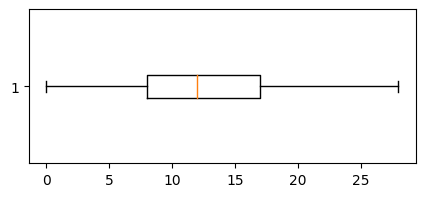

In [ ]:
# ดูการกระจายของ Value column
plt.figure(figsize=(5,2))
plt.boxplot(day_RI2_df.Value.dropna(),vert=False)
plt.show()

ในข้อมูลไม่มี outliers แล้ว

    e. How should we best deal with the missing values if our goal is to draw multiple boxplots that show the central tendency and variation of temperature across the months? Draw the described visualization after dealing with the missing values.

<Axes: xlabel='Value', ylabel='Count'>

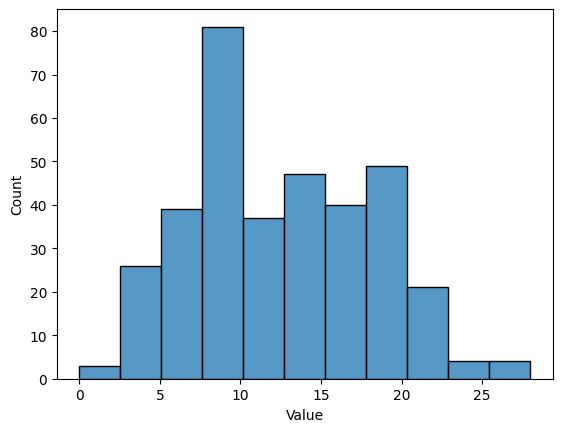

In [ ]:
# ดูการกระจายของ Value ในแต่ละเดือน
sns.histplot(data=day_RI2_df, x="Value")

<Axes: xlabel='Month', ylabel='Value'>

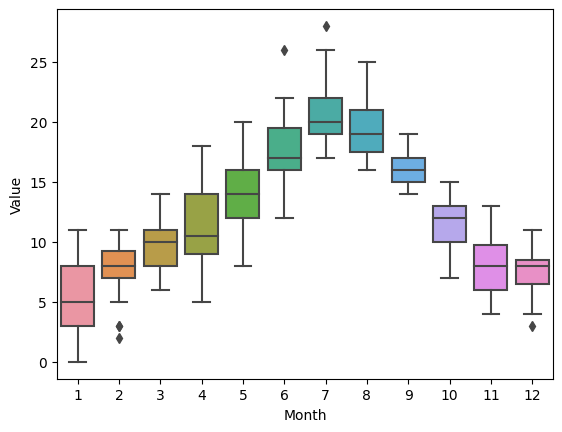

In [ ]:
# ดูการกระจายของ Value ในแต่ละเดือน
sns.boxplot(y=day_RI2_df.Value, x=day_RI2_df.Month)

In [ ]:
# จัดการ na โดยเติมด้วยค่า mean ของ Value column ใช้วิธีนี้เพราะข้อมูลหายไปไม่เยอะ
day_RI2_df['Value'].fillna(day_RI2_df['Value'].mean(), inplace=True)

In [ ]:
#ตรวจสอบ na ในข้อมูล
day_RI2_df.isna().sum() # จะเห็นว่าไม่มี na ในข้อมูลแล้ว

Value    0
Date     0
Day      0
Month    0
Year     0
dtype: int64

<Axes: xlabel='Value', ylabel='Count'>

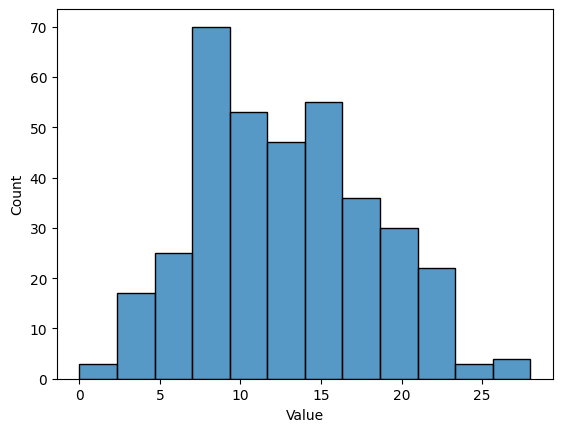

In [ ]:
# ดูการกระจายของ Value ในแต่ละเดือน หลังจากที่จัดการ na แล้ว
sns.histplot(data=day_RI2_df, x="Value")

<Axes: xlabel='Month', ylabel='Value'>

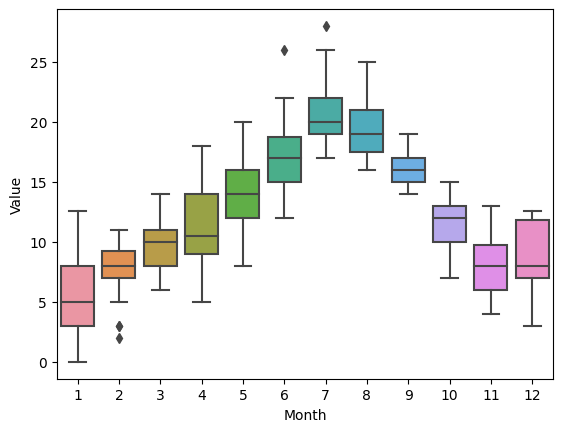

In [ ]:
# ดูการกระจายของ Value ในแต่ละเดือน หลังจากที่จัดการ na แล้ว
sns.boxplot(y=day_RI2_df.Value, x=day_RI2_df.Month)

จะเห็นว่าพอดูการกระจายของ Value ในแต่ละเดือน จะมี outliers เกิดขึ้น ต่างจากตอนที่ดูการกระจายของ Value อย่างเดียว ส่วนตัวคิดว่า outliers ที่เกิดขึ้นมีจำนวนไม่เยอะมากนัก น่าจะไม่ส่งผลกระทบต่อการวิเคราะห์ต่อ จึงสามารถนำไปใช้ต่อได้เลย